# Final Project
## Belajar Mengembangkan Model Database dengan Python untuk Menjadi Analis Database
## Batch 6

## Heart Disease UCI
Source: https://www.kaggle.com/ronitf/heart-disease-uci#

Attribute Information:
  - age
  - sex
  - chest pain type (4 values)
  - resting blood pressure
  - serum cholestoral in mg/dl
  - fasting blood sugar > 120 mg/dl
  - resting electrocardiographic results (values 0,1,2)
  - maximum heart rate achieved
  - exercise induced angina
  - oldpeak = ST depression induced by exercise relative to rest
  - the slope of the peak exercise ST segment
  - number of major vessels (0-3) colored by flourosopy
  - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [149]:
# Importing References
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


plt.style.use('Solarize_Light2')

In [150]:
# Load data from CSV
data = pd.read_csv('heart.csv')

In [151]:
# Count the rows
len(data)

303

In [185]:
# Show information of DataFrame datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [186]:
# Check for null / empty values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From the information, data does not have missing value

In [153]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [154]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


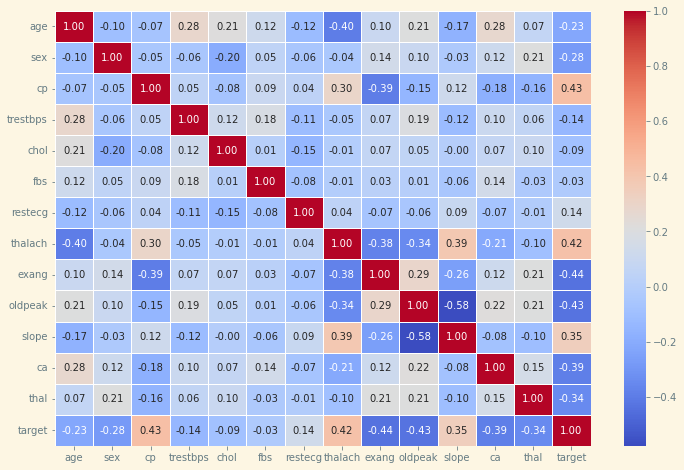

In [155]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, linewidths=1, fmt=".2f", cmap="coolwarm")
plt.show()

Data Splitting & Modelling

In [156]:
# Split into X and Y
x = data.drop("target", axis=1)
y = data["target"]

In [157]:
# Show X
len(x), x

(303,
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     

In [158]:
# Show Y
len(y), y

(303,
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, Length: 303, dtype: int64)

In [159]:
# Data Train
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    # test_size=0.5,
    # train_size=0.5,
    random_state=np.random.seed(42)
)

### Machine Learning Model
After splitting data, we need to test it to find patterns from the dataset `data`.

#### Logistic Regression

In [160]:
logisticRegression = LogisticRegression(solver="liblinear")
logisticRegression.fit(x_train, y_train)
yPrediction = logisticRegression.predict(x_test)
logisticRegressionScore = accuracy_score(yPrediction, y_test)

In [161]:
### Logistic Regression Accuracy
print(f"Machine Learning Accuracy with Logistic Regression: {(logisticRegressionScore)*100:0.2f}%")

Machine Learning Accuracy with Logistic Regression: 86.84%


In [162]:
### Logistic Regression Classification Report
print(classification_report(y_test, logisticRegression.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



<AxesSubplot:>

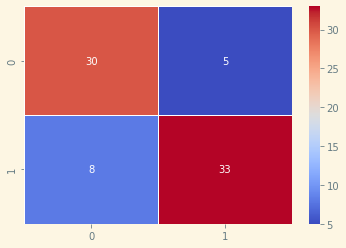

In [190]:
#### Confusion Matrix
sns.heatmap(confusion_matrix(y_test, yPrediction), annot=True, linewidths=1, cmap="coolwarm")

From top left, clockwise:
  - True Negative
  - False Positive
  - True Positive
  - False Negative

In [164]:
tn, fp, fn, tp = confusion_matrix(y_test, logisticRegression.predict(x_test)).ravel()

In [165]:
# Confusion Matrix Recall
# TP / (TP+FN)
recall = tp / (tp+fn)
print(f"Confusion Matrix Recall: {(recall)*100:0.2f}%")

Confusion Matrix Recall: 90.24%


In [166]:
# Confusion Matrix Precision
# TP / (TP+FP)
precision = tp / (tp+fn)
print(f"Confusion Matrix Precision: {(precision)*100:0.2f}%")

Confusion Matrix Precision: 90.24%


In [167]:
# Confusion Matrix Accuracy
# (TP+TN) / (TP+TN+FP+FN)
accuracy = (tp+tn) / (tp+tn+fp+fn)
print(f"Confusion Matrix Accuracy: {(accuracy)*100:0.2f}%")

Confusion Matrix Accuracy: 86.84%


#### K-Nearest Neighbors

Machine Learning Accuracy with K-Nearest Neighbors: 75.00%


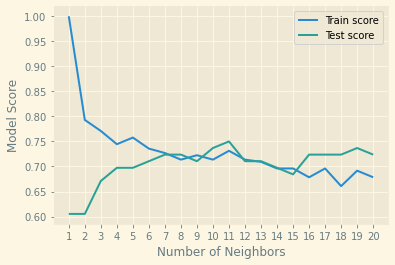

In [168]:
knn_train_scores = []
knn_test_scores = []

neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_train_scores.append(knn.score(x_train, y_train))
    knn_test_scores.append(knn.score(x_test, y_test))

plt.plot(neighbors, knn_train_scores, label="Train score")
plt.plot(neighbors, knn_test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Machine Learning Accuracy with K-Nearest Neighbors: {max(knn_test_scores)*100:0.2f}%")
knnScore = max(knn_test_scores)

#### Support Vector Machine

In [169]:
supportVector = SVC(kernel='linear')
supportVector.fit(x_train, y_train)
yPrediction = supportVector.predict(x_test)
supportVectorAccuracy = accuracy_score(yPrediction, y_test)

print(f"Machine Learning Accuracy with Support Vector Machine: {supportVectorAccuracy*100:0.2f}%")

Machine Learning Accuracy with Support Vector Machine: 86.84%


#### Naive Bayes

In [170]:
naiveBayes = GaussianNB()
naiveBayes.fit(x_train, y_train)
yPrediction = naiveBayes.predict(x_test)
naiveBayesAccuracy = accuracy_score(yPrediction, y_test)

print(f"Machine Learning Accuracy with Naive Bayes: {naiveBayesAccuracy*100:0.2f}%")

Machine Learning Accuracy with Naive Bayes: 88.16%


#### Random Forest

In [171]:
randomForest = RandomForestClassifier(n_estimators=50)
randomForest.fit(x_train, y_train)
yPrediction = randomForest.predict(x_test)
randomForestAccuracy = accuracy_score(yPrediction, y_test)

print(f"Machine Learning Accuracy with Random Forest: {randomForestAccuracy*100:0.2f}%")

Machine Learning Accuracy with Random Forest: 81.58%


#### Decision Tree

In [172]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(x_train, y_train)
yPrediction = decisionTree.predict(x_test)
decisionTreeAccuracy = accuracy_score(yPrediction, y_test)

print(f"Machine Learning Accuracy with Decision Tree: {decisionTreeAccuracy*100:0.2f}%")

Machine Learning Accuracy with Decision Tree: 82.89%


### Machine Learning Results

All result of 6 ML Model tests

In [173]:
mlScores = pd.DataFrame({
    'model': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes', 'Random Forest', 'Decision Tree'],
    'accuracy': [logisticRegressionScore, knnScore, supportVectorAccuracy, naiveBayesAccuracy, randomForestAccuracy, decisionTreeAccuracy]
})

mlScores

,model,accuracy
0,Logistic Regression,0.868421
1,K-Nearest Neighbors,0.750000
2,Support Vector Machine,0.868421
3,Naive Bayes,0.881579
4,Random Forest,0.815789
5,Decision Tree,0.828947


In [179]:
# Sorted Models Score
mlScores.sort_values(by='accuracy', ascending=False, inplace=True)

mlScores

,model,accuracy
3,Naive Bayes,0.881579
0,Logistic Regression,0.868421
2,Support Vector Machine,0.868421
5,Decision Tree,0.828947
4,Random Forest,0.815789
1,K-Nearest Neighbors,0.750000


Text(0.5, 1.0, 'Machine Learning Score')

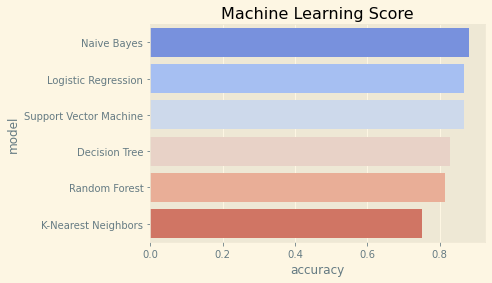

In [184]:
sns.barplot(
    x=mlScores['accuracy'],
    y=mlScores['model'],
    palette='coolwarm'
).set_title('Machine Learning Score')

From the result of our test, we can conclude that Naive Bayes and Logistic Regression has the highest value from all machine learning models.
For heart disease, I chose Logistic Regression, as Naive Bayes tends to assumes that data are conditionally independent. Real data sets are never perfectly independent, especially when detecting heart disease.